<a href="https://colab.research.google.com/github/bacdam91/mxnet-tutorial/blob/master/Automatic_differentiation_with_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install mxnet

     |████████████████████████████████| 25.4MB 113kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# Automatic differentiation with ```autograd```

### Minimising loss

The purpose of training a neural network is so that it can get better at predicting an outcome, $Y$, from the features, $X$, we present to it. One of the ways to measure if the network is getting better is through minimising the loss or error.

To achieve this goal, we can compute the gradient of the loss function with respect to weights and then update the weights accordingly. We can do this by hand or we can use the ```autograd``` package to expedite this process by automatically calculating the derivatives.

### Basic usage

Let's first import the necessary packages

In [0]:
from mxnet import nd
from mxnet import autograd

As an example, we would like to find the derivative of the function $f(x) = 2x^2$. Recalling our high school mathematics, we know that the derivative is $f'(x) = 4x$. Using this simple function as an example will help us evaluate and understand the ```autograd``` package in depth.

Firstly let us assign an initial value of ```X```.



In [4]:
X = nd.array([[1, 2], [3, 4]])
X


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

Before we calculate the gradient of $f(x)$, we need to specify the storage by invoking the ```.attach_grad()``` method on the NDArray ```X```.

In [0]:
X.attach_grad()

We can check the gradient of each value in ```X``` by accessing the ```.grad``` attribute. Since we have not actually calculated anything, we expect to see zeros.

In [6]:
X.grad


[[0. 0.]
 [0. 0.]]
<NDArray 2x2 @cpu(0)>

Now we are going to define the function $y = f(x)$. To let MXNet store $Y$, so that we can compute gradients later, we need to put the definition inside an ```autograd.record()``` scope.

In [7]:
with autograd.record():
    Y = 2 * X * X
Y


[[ 2.  8.]
 [18. 32.]]
<NDArray 2x2 @cpu(0)>

Outputing ```Y``` we can see that the values in ```X``` are plugged into $f(x)$. We can manually evaluate this to understand what has happened.

1. $f(1) = 2 \times 1^{2} = 2$
2. $f(2) = 2 \times 2^{2} = 2 \times 4 = 8$
3. $f(3) = 2 \times 3^{2} = 2 \times 9 = 18$
4. $f(4) = 2 \times 4^{2} = 2 \times 16 = 32$

We can see that ```Y``` now stores the value results of $f(x)$ over the values in ```X```.



To calculate the gradient of $f(x)$, in other words, calculating $f'(x)$, we need to call the ```.backward()``` method on ```Y```, which invoke back propagation.

In [8]:
print("Before back-prop")
print(X)
print(X.grad)
print(Y)
Y.backward()
print("After back-prop")
print(X)
print(X.grad)
print(Y)

Before back-prop

[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

[[0. 0.]
 [0. 0.]]
<NDArray 2x2 @cpu(0)>

[[ 2.  8.]
 [18. 32.]]
<NDArray 2x2 @cpu(0)>
After back-prop

[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

[[ 4.  8.]
 [12. 16.]]
<NDArray 2x2 @cpu(0)>

[[ 2.  8.]
 [18. 32.]]
<NDArray 2x2 @cpu(0)>


We can see that before calling the ```.backward()``` method on ```Y```, the values of ```X.grad``` are zeros. After invoking back propagation, ```X.grad``` gives us the gradient at each $x$ value. 

We can manually check this to confirm the values are as we expected.

$f(x) = 2x^{2}$

$f'(x) = 4x$

1. $f'(1) = 4 \times 1 = 4$
2. $f'(2) = 4 \times 2 = 8$
3. $f'(3) = 4 \times 3 = 12$
4. $f'(4) = 4 \times 4 = 16$

### Using Python control flows

Sometimes we want to write dynamic programs where the execution depends on some real-time values. MXNet will record the execution trace and compute the gradient as well.

Consider the following function f(a): it doubles the inputs until its norm reaches 1000. Then it selects one element depending on the sum of its elements.

We will ask it to output ```b``` during the calculation and tell us when its norm is greater than 1000.

In [0]:
def f(a):
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
        print(b)
        print(b.sum().asscalar())
        print(b.norm().asscalar())
    
    print("Done")
    if b.sum().asscalar() >= 0:
        c = b[0]
    else:
        c = b[1]
    return c

We record the trace and feed in a random value. We will let the range be between -1 and 1 so the simulation can produce a sum of ```b``` of less than 0 while the norm (```b.norm()``` is greater than 1000.

In [10]:
a = nd.random.uniform(-1, 1, shape=2)
print(a)
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()
c


[0.09762704 0.18568921]
<NDArray 2 @cpu(0)>

[0.39050817 0.74275684]
<NDArray 2 @cpu(0)>
1.133265
0.8391569

[0.78101635 1.4855137 ]
<NDArray 2 @cpu(0)>
2.26653
1.6783139

[1.5620327 2.9710274]
<NDArray 2 @cpu(0)>
4.53306
3.3566277

[3.1240654 5.9420547]
<NDArray 2 @cpu(0)>
9.06612
6.7132554

[ 6.248131  11.8841095]
<NDArray 2 @cpu(0)>
18.13224
13.426511

[12.496262 23.768219]
<NDArray 2 @cpu(0)>
36.26448
26.853022

[24.992523 47.536438]
<NDArray 2 @cpu(0)>
72.52896
53.706043

[49.985046 95.072876]
<NDArray 2 @cpu(0)>
145.05792
107.41209

[ 99.97009 190.14575]
<NDArray 2 @cpu(0)>
290.11584
214.82417

[199.94019 380.2915 ]
<NDArray 2 @cpu(0)>
580.2317
429.64835

[399.88037 760.583  ]
<NDArray 2 @cpu(0)>
1160.4634
859.2967

[ 799.76074 1521.166  ]
<NDArray 2 @cpu(0)>
2320.9268
1718.5934
Done



[799.76074]
<NDArray 1 @cpu(0)>

We know that ```b``` is a linear function of ```a```, and ```c``` is chosen from ```b```. Then the gradient with respect to a be will be either ```[c/a[0], 0]``` or ```[0, c/a[1]]```, depending on which element from b we picked. Let’s find the results:

In [11]:
[a.grad, c/a]

[
 [8192.    0.]
 <NDArray 2 @cpu(0)>, 
 [8192.     4306.9854]
 <NDArray 2 @cpu(0)>]

### A quick side note

The ```.norm()``` method calculates, by default, the $l_2$ norm of a matrix. The resulting value is an array of a single value, i.e., a scalar, but it requires explicit conversion to a scalar with the method ```.asscalar()```.

The section below is a manual calculation of the $l_2$ norm and is optional but will help us to gain a better understanding of the $l_2$ norm calculation.

### The $l_2$ norm

The $l_2$ norm is defined according to the following equation:

$||X||_{2} = (\sum^{n}_{i = 1} x_i^2)^{\frac{1}{2}}$

The equation may look complicate it but it is quite simple. Basically it is asking us to find the square root of the sum of all values in $X$ squared. This will make more sense when we go to calculate it by manually.

Let's define a matrix, $X$, and calculate its norm.


In [0]:
X = nd.array([[2, 4], [7, 5]])

In [13]:
X.norm()


[9.695359]
<NDArray 1 @cpu(0)>

Now let us manually work out the norm according the equation for $l_2$ norm above.

1. when $i = 1$, $x = 2$, i.e., ```X[0,0]```, hence the $x^2$ equals $4$.
2. when $i = 2$, $x = 3$, i.e., ```X[0,1]```, hence the $x^2$ equals $16$.
3. when $i = 3$, $x = 7$, i.e., ```X[1,0]```, hence the $x^2$ equals $49$.
4. when $i = 4$, $x = 5$, i.e., ```X[1,1]```, hence the $x^2$ equals $25$.
5. the sum of those values is $4 + 16 + 49 + 25 = 94$
6. the square root of the sum is $\sqrt{94} \approx 9.695359$, which is the same as the value calculated by the ```.norm()``` method.

Putting it all together:

$||X||_2 = \sqrt{2^2 + 4^2 + 7^2 + 5^2} = \sqrt{94} \approx 9.695359$

### The sum

The method ```.sum()``` simplies add all the values together. Consider the same matrix $X$, the sum of $X$, e.g., ```X.sum()``` equals 18.

$sum(X) = 2 + 4 + 7 + 5 = 18$

We can check by calling the ```.sum()``` method.

In [14]:
X.sum()


[18.]
<NDArray 1 @cpu(0)>

### More fun with ```autograd```

Now that we have an understanding of what ```autograd``` is and how it works, let's muck around with it a little by using it to plot a graph and its gradient function. We will use ```matplotlib``` to plot the two graphs. If you are unfamiliar with ```matplotlib```, please check out my channel for the tutorials.

#### Defining a function

Let's define a simple quadratic function, $f(x) = x^{2}. $

In [0]:
def f(x):
    y = x ** 2
    return y

Let's create some $x$ values and store them in an ```NDArray``` and call the ```.attach_grad()``` method to store the gradients at the $x$ values when we perform back propagation.

In [56]:
x = nd.array([i for i in range(-10, 11)])
x.attach_grad()
print("x", x)
print("x.grad", x.grad)

x 
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
<NDArray 21 @cpu(0)>
x.grad 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 21 @cpu(0)>


Let's calculate $y$ by calling the ```f(x)``` function within the ```autograd.record()``` scope.

In [57]:
with autograd.record():
    y = f(x)
print("y", y)

y 
[100.  81.  64.  49.  36.  25.  16.   9.   4.   1.   0.   1.   4.   9.
  16.  25.  36.  49.  64.  81. 100.]
<NDArray 21 @cpu(0)>


We will now perform back propagation by calling ```.backward()```. We can store the gradients in a separate variable, ```grad```.

Manually deriving $y = x^{2}$, we get $\frac{dy}{dx} = 2x$. So if $x = -10$ the gradient should be $-20$. Inspecting the array of gradient, ```grad```, we see that the first element is ```-20```.

In [58]:
y.backward()
grad = x.grad
print("grad", grad)

grad 
[-20. -18. -16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.
   8.  10.  12.  14.  16.  18.  20.]
<NDArray 21 @cpu(0)>


We'll import ```numpy``` and ```matplotlib```, and create three arrays of x values, y values and plot titles for use in ```zip()``` function for parallel iteration. We'll create a subplot and graph the two functions as $f(x)$ and $f'(x)$.

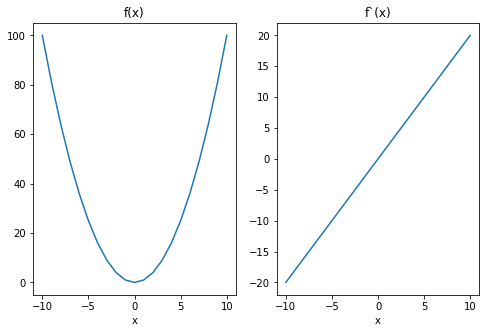

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.array([x.asnumpy(), x.asnumpy()])
y_vals = np.array([y.asnumpy(), grad.asnumpy()])
titles = np.array(["f(x)", "f`(x)"])

fig, ax = plt.subplots(1, 2, figsize=(8, 5))
for ax_i, x_i, y_i, t in zip(ax, x_vals, y_vals,titles):
    ax_i.plot(x_i, y_i)
    ax_i.set_title(t)
    ax_i.set_xlabel("x")